# Bioindicators of Strawberry Creek
### Professors Mary Power, John Huelsenbeck & Bruce Baldwin
_Estimated Time: 50 minutes_

Welcome! In this lab you will be using data science tools to determine the significance between the ecological health of the two branches of Strawberry Creek.

**Learning Outcomes**

By the end of the notebook, students should be able to:

1. Explain the use of biological organisms as indicators of ecosystem health
2. Define dichotomous keys and use them to ID organisms
3. Interpret biological metrics: taxa richness, %EPT, Biotic Index, % Filterers, % Predators
4. Analyze simulated resampling to determine if two assemblages of organisms are different fro

## Table of Contents 

1. [Jupyter Notebooks](#1)
    - [Types of Cells](#1.1)
    - [Running Cells](#1.2)
    - [Editting, Saving and Submitting](#1.3)
    - [Debugging Tips and Jupyter Help](#1.4)
<br/><br/>
2. [Introduction to Data Analytics](#2)
    - [Null and Alternate Hypothesis](#2.1)
    - [Permutation Test](#2.2)
    - [Bootstrapping](#2.3)
<br/><br/>
3. [Introduction to Data Analytics](#3)
    - [Experiment 1](#3.1)
    - [Experiment 2](#3.2)
    - [Experiment 3](#3.3)
<br/><br/>

## Jupyter Notebooks <a id='1'></a>

This lab is currently set up in a Jupyter Notebook. A Jupyter Notebook is an online, interactive computing environment, composed of different types of __cells__. Cells are chunks of code or text that are used to break up a larger notebook into smaller, more manageable parts and to let the viewer modify and interact with the elements of the notebook.
 
### Types of cells <a id= '1.1'> </a>

There are two types of cells in Jupyter, __code__ cells and __markdown__ cells. Code cells are cells indicated with “In [ ]:” to the left of the cell. In these cells you can write you own code and run the code in the individual cell.
Markdown cells hold text a majority of the time and do not have the “In [ ]” to the left of the cell (Just an empty space). 

### Running cells <a id= '1.2'> </a>

"Running" a cell is similar to pressing 'Enter' on a calculator once you've typed in an expression; it computes all of the expressions contained within the cell.

To run a code cell, you can do one of the following:
- press __Shift + Enter__
- click __Cell -> Run Cells__ in the toolbar at the top of the screen.

You can navigate the cells by either clicking on them or by using your up and down arrow keys. Try running the cell below to see what happens. 

In [4]:
print("Hello, World!")

Hello, World!


The input of the cell consists of the text/code that is contained within the cell's enclosing box. Here, the input is an expression in Python that "prints" or repeats whatever text or number is passed in. 

The output of running a cell is shown in the line immediately after it. Notice that markdown cells have no output. 

### Editing, Saving and Sumbitting <a id='1.3'> </a>

- To __edit__ a cell simply click on the desired cell and begin typing 
- To __save__ your notebook press command + s on the keyboard 
- We will go into the specifics of how to __submit__ your work at the end of the lab, but you will essentially be converting your work into a PDF file and then submitting it to bCourses

### Debugging Tips and Jupyter Help <a id= '1.4'> </a>

...

## Introduction <a id='2'> </a>

Throughout the course of this lab you will be using Python to analyze the data that you collected from Strawberry Creek. The main purpose of this lab is to determine whether or not the ecological health of the two branches of the creek have a significant different.

**More about how it relates to lab -exactly how they are going to use code and stuff- and why data analysis is helpful for what they are doing**

In [5]:
! pip install qgrid
import pandas as pd
import ipywidgets as widgets
import numpy as np
import qgrid
from datascience import *
from IPython.display import display

## Data Recording

## Introduction to Data Analytics <a id= '2'> </a>

### Null Hypothesis vs. Alternate Hypothesis <a id='2.1'> </a>

One of the first problems to work through when looking at a data set is to determine whether or not the trends in the data are significant or purely due to random chance. In this particular lab we are trying to determine whether or not the difference between the ecological healths of the two branches of the creek are significant or if it is due to chance. To do this we begin by forming a null hypothesis and an alternative hypothesis to test. 

__Null Hypothesis__: A null hypothesis claims that there is no statistical difference between two distributions and that any difference is due to experimental error or chance.

__Alternative Hypothesis__: An alternative hypothesis essentially counters the null hypothesis and claims that the difference in distribution is significant.

Example Null and Alternative Hypothesis

Say we have a data set with data on the number of boba shops on Southside and Northside. The data set shows that Southside has a higher average of boba shops than Northside, but it is unclear whether the difference in the average is due to chance or some other unknown reason. For this data set potential hypotheses would be:

Example Null Hypothesis
- The distribution of the average of boba shops is the same for the samples taken from Southside as the samples taken from Northside. The difference in sample distribution is due to chance. 

Example Alternative Hypothesis  
- The average of boba shops in Northside is lower than the average of boba shops in Northside.

**What would be a potential null hypothesis for this lab?**

_Type your answer here_

**What would be a potential alternative hypothesis?**

_Type your answer here_

After you have your null and alternative hypothesis, the next step is to simulate the distribution under the null hypothesis! Theoretically, if the difference in distribution were solely due to random chance, then the data that the distribution originally comes from would not matter. This is where permutation tests come in to play.

### Permutation Test <a id='2.2'> </a>

A permutation test essentially shuffles the given data set and creates new distributions. In this case, we are using a permutation test to shuffle the difference in ecological health of the two creeks. As was previously mentioned, permutation tests simulate the null hypothesis because it assumes that there is no significant difference between the distributions. 

In [6]:
north_fork_example = pd.DataFrame({
    'FBI Score':[3.5, 4.0, 3.0, 3.5, 4.2],
    'Mean FBI Score':[3.64, 3.64, 3.64, 3.64, 3.64],
    'Score - Mean':[-0.14, 0.36, -0.64, -0.14, 0.56],
    'Square of Difference':[0.0196, 0.1296, 0.4096, 0.0196, 0.3136]
})

north_fork_example

,FBI Score,Mean FBI Score,Score - Mean,Square of Difference
0,3.5,3.64,-0.14,0.0196
1,4.0,3.64,0.36,0.1296
2,3.0,3.64,-0.64,0.4096
3,3.5,3.64,-0.14,0.0196
4,4.2,3.64,0.56,0.3136


In [7]:
example = pd.DataFrame({
    'FBI Score':[3.5, 4.0, 3.0, 3.5, 4.2, 4.5, 5.0, 3.6, 4.9, 5.1, 3.4, 2.9],
    'Fork':np.append(np.repeat('North', 5), np.repeat('South', 7))
})
example

,FBI Score,Fork
0,3.5,North
1,4.0,North
2,3.0,North
3,3.5,North
4,4.2,North
5,4.5,South
6,5.0,South
7,3.6,South
8,4.9,South
9,5.1,South


In [8]:
observed_difference = example[example['Fork']=='North'].mean() - example[example['Fork']=='South'].mean()
observed_difference

FBI Score   -0.56
dtype: float64

In [9]:
perm_example = pd.DataFrame({
    'FBI Score':example['FBI Score'].sample(len(example['FBI Score'])),
    'Fork':np.append(np.repeat('North', 5), np.repeat('South', 7))
})
perm_example

,FBI Score,Fork
5,4.5,North
11,2.9,North
10,3.4,North
1,4.0,North
4,4.2,North
7,3.6,South
9,5.1,South
2,3.0,South
3,3.5,South
6,5.0,South


In [10]:
perm_difference = perm_example[perm_example['Fork']=='North'].mean() - perm_example[perm_example['Fork']=='South'].mean()
perm_difference

FBI Score   -0.285714
dtype: float64

_explain what the graph is showing_

To make the observations more generalizable, we perform the permutation test many more times and compile the distributions to see what range a distribution under the null hypothesis would be. 

In [11]:
def difference_in_means(fbi_scores):
    return np.mean(fbi_scores[:5]) - np.mean(fbi_scores[5:])

n_repeats = 1000
permutation_differences = []
for i in range(n_repeats):
    permutation = example['FBI Score'].sample(len(example['FBI Score']))
    new_difference = difference_in_means(permutation)
    permutation_differences.append(new_difference)

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

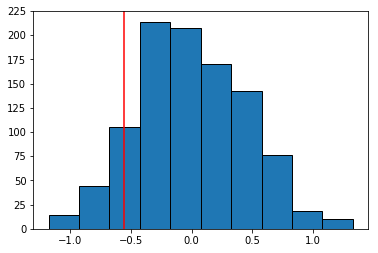

In [13]:
plt.hist(permutation_differences)
plt.axvline(observed_difference[0], color='red');

#### Introduction to permutation test
- Null hypothesis (the observed difference between the two branches is due to random chance) vs alternate hypothesis
- Code: resample data, recalculate metrics
- Question: do we see a difference?


### Bootstrapping <a id='2.3'> </a>

Another problem that often surfaces when analysing a data set is the accuracy of an estimated statistic. For example, if we wanted to provide an estimate of the ecological health of the whole Strawberry Creek, using the calculations from just the North Fork or South Fork would not be representative of the whole creek. On the otherhand, it would also not be feasible to go around collecting samples and calculating the ecological health of every section of the creek. This is where bootstrapping comes into play!  

Bootstrapping generates new random samples by drawing samples from the original data set. We essentially treat our data set as the population. We randomly draw from the data set __with replacement__ to creat new data sets that are the same size as the original.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a230085f8>]],
      dtype=object)

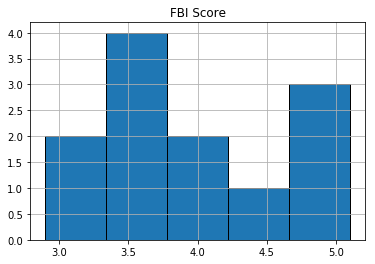

In [63]:
example.hist(bins = 5)

In [27]:
example.mean(axis = 0)

FBI Score    3.966667
dtype: float64

Using only the data collected from your individual experiment, the estimated average Family Biotic Index (FBI) is 3.966667, but as we described above, this is not an accurate representation of the average FBI of the whole creek. One solution is to use bootstrapping. 

In [65]:
new_sample = example.sample(n = 12, replace = True)
new_sample

,FBI Score,Fork
8,4.9,South
3,3.5,North
0,3.5,North
5,4.5,South
5,4.5,South
8,4.9,South
2,3.0,North
9,5.1,South
0,3.5,North
8,4.9,South


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a23284a90>]],
      dtype=object)

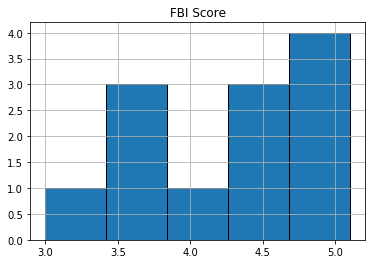

In [66]:
new_sample.hist(bins = 5)

In [87]:
np.mean(new_sample)

FBI Score    4.25
dtype: float64

After performing the bootstrapping method once, we have a new average FBI Score of 4.25.

Now we repeat the bootstrapping method many times and compile the calculated FBI averages into one distribution!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a24051d68>]],
      dtype=object)

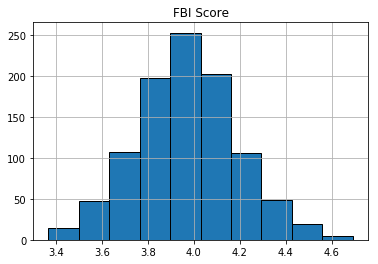

In [94]:
FBI_averages = []
for i in np.arange(1000):
    one_new_sample = example.sample(n = 12, replace = True)
    average = np.mean(one_new_sample)
    FBI_averages.append(average)
pd.DataFrame(FBI_averages).hist()

Theoretically the data set that is collected represents the population, so the distribution of the original sample will resemble the distribution of the population. Similarly, the resampled data sets will resemble the original data set and therefore the population, which is why resampling from the same sample works for bootstrapping!

__P-Values & Statistical Significance__

## Submitting the Lab

... 

In [ ]:
#not exactly sure why the qgrid widget isn't displaying anything

In [ ]:
data = pd.read_csv('ice cream.csv')

In [ ]:
qgrid.show_grid(data)

In [ ]:
data